In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from subprocess import call

In [3]:
df = pd.read_csv("../data/SPARCS_cancer_binary.csv")

In [4]:
drops = ["Unnamed: 0"]
for col in list(df.columns):
    if df[col].isnull().sum() > 0:
        drops.append(col)

In [ ]:
drops

In [5]:
df = df.drop(columns = drops)

In [6]:
# Scale the data and normalize

sc = StandardScaler() 
df_scaled = sc.fit_transform(df)
df_normalized = normalize(df_scaled)
sub = df.iloc[0:10000, :]
sc1 = StandardScaler() 
sub_scaled = sc1.fit_transform(sub)
sub_normalized = normalize(sub_scaled)

In [7]:
agg_clustering = AgglomerativeClustering(n_clusters = 100, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
 
labels = agg_clustering.fit_predict(df_normalized)

In [89]:
agg_clustering.fit(df_normalized)

KeyboardInterrupt: 

In [12]:
agg_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=100,
            pooling_func=<function mean at 0x11141f400>)

In [14]:
labels

array([11,  9, 97, ..., 44, 35, 44])

In [ ]:
#Linkage Matrix
lka = linkage(sub_normalized)
plt.figure(figsize=(500,500))
dendro  = dendrogram(lka, leaf_rotation=90., leaf_font_size=0.5,)
plt.savefig('plt.png', format='png', bbox_inches='tight')
plt.savefig('plt.jpg', format='jpg', bbox_inches='tight')

In [ ]:
#df.to_csv("../data/clusteruse_data.csv")

In [20]:
df1 = df.copy()
df1["Cluster.Label"] = labels

In [21]:
clusters = []
for i in range(1, 101):
    sub_clus = df1[df1["Cluster.Label"] == i]
    clusters.append(sub_clus)

In [75]:
total_charge = []
apr_serv = []
apr_mort = []
age = []
stay = []
gender = []
size = []
for i in range(100):
    clus = clusters[i]
    total_charge.append(clus["Total.Charges"].mean())
    apr_serv.append(clus["APR.Severity.of.Illness.Code"].mean())
    apr_mort.append(clus["APR.Risk.of.Mortality"].mean())
    age.append(clus["Age.Ordinal"].mean())
    stay.append(clus["Length.of.Stay"].mean())
    gender.append(clus["Gender.F"].mean())
    size.append(len(clus))

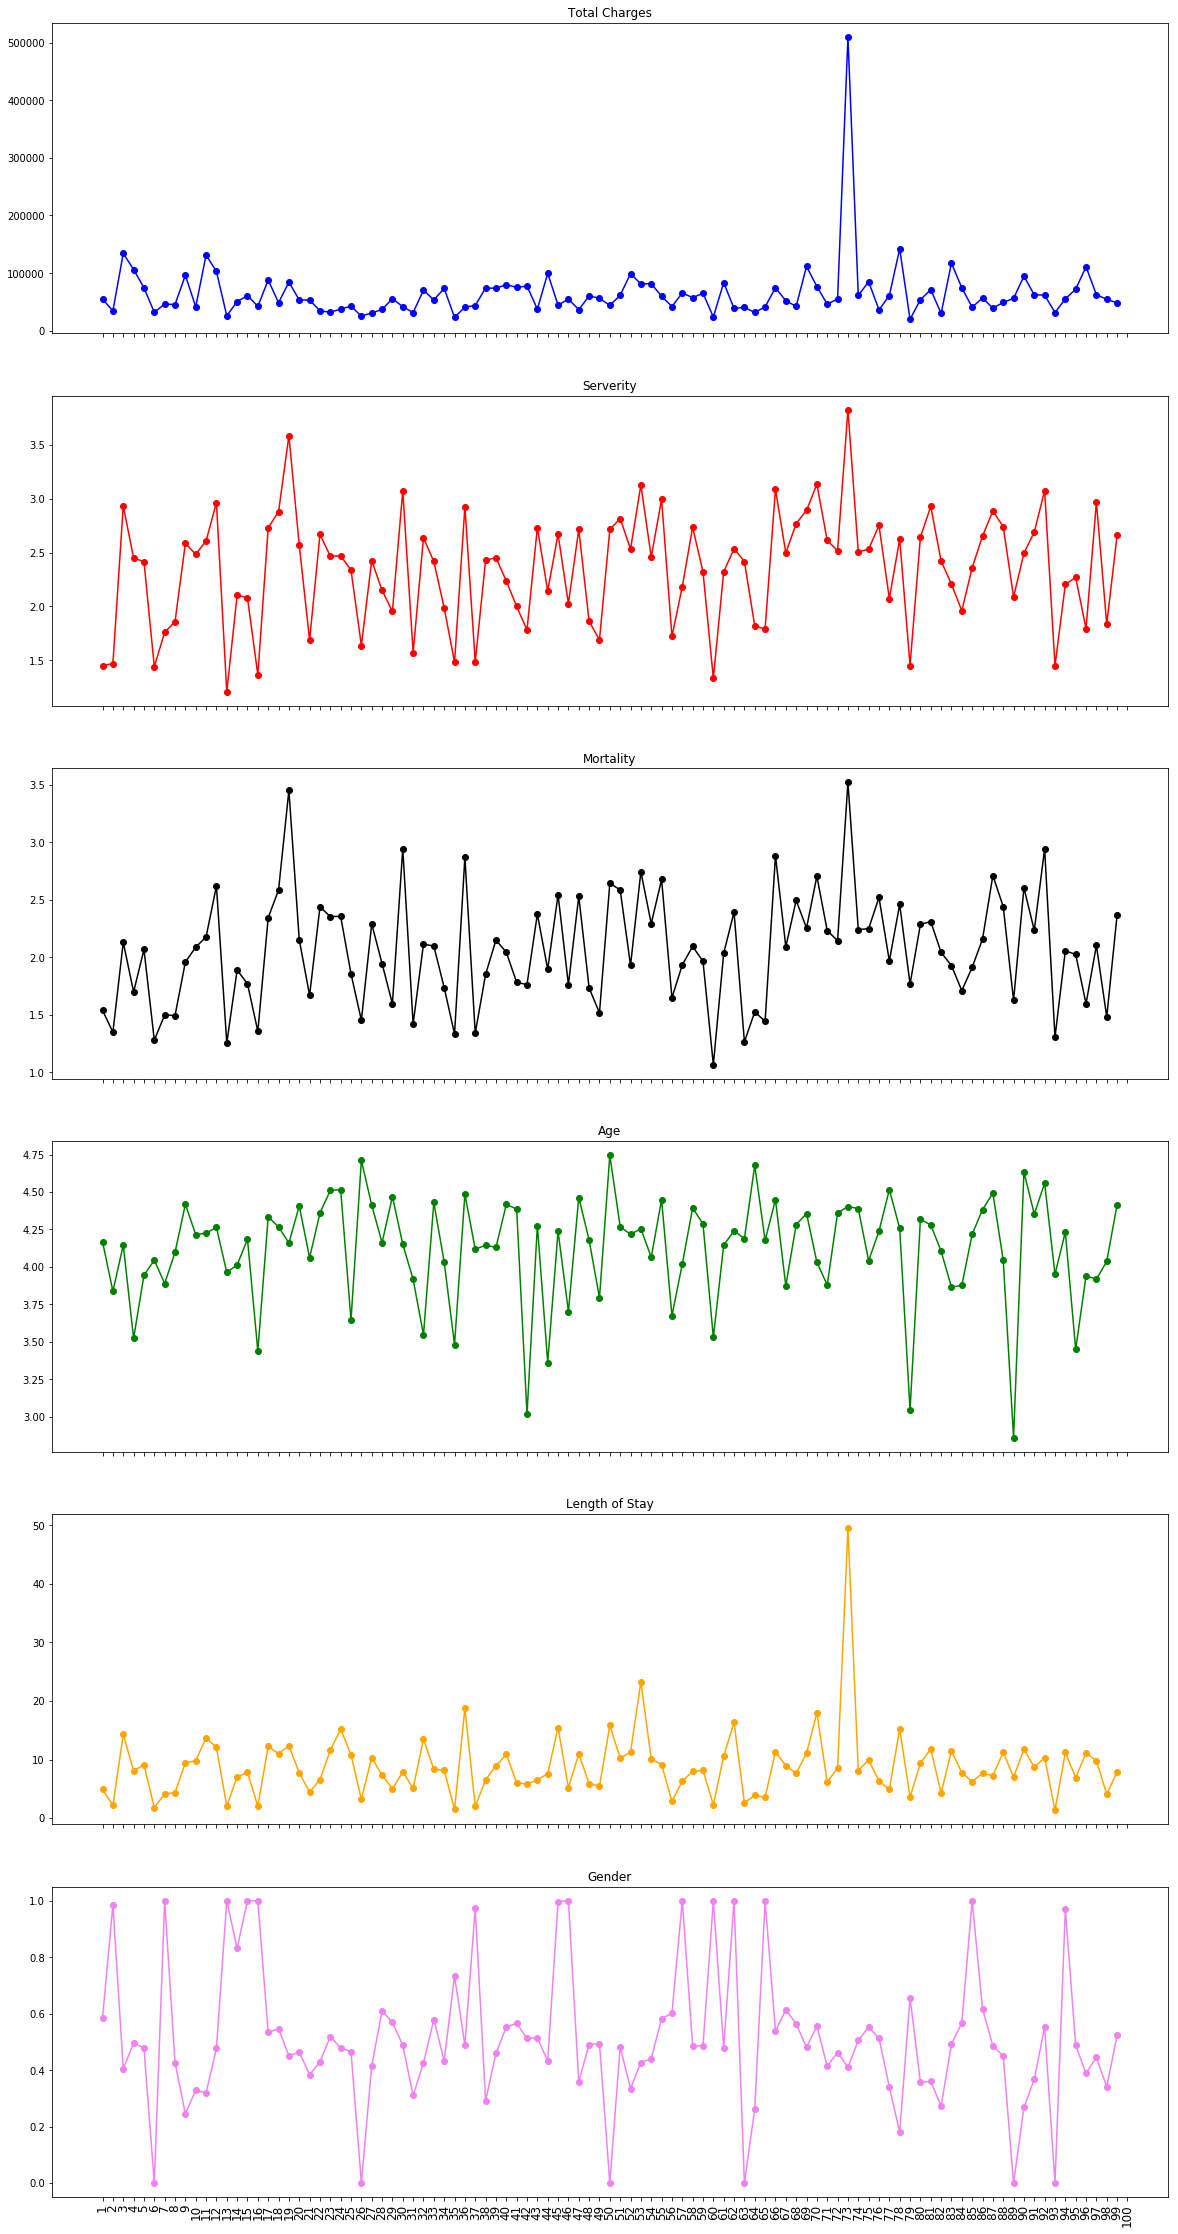

In [60]:
# plot something
x = range(1, 101)
fig, axs = plt.subplots(6,1, figsize=(20, 40), sharex=True, sharey=False)
Ys = [total_charge, apr_serv, apr_mort, age, stay, gender]
Ylabs = ["Total Charges", "Serverity", "Mortality", "Age", "Length of Stay", "Gender"]
colors = ["blue", "red", "black", "green", "orange", "violet"]
for i, ax in enumerate(axs.flat):
    ax.plot(x, Ys[i], marker = "o", color = colors[i])
    ax.set_title(Ylabs[i])
    ax.set_xticks(list(x)) 
    ax.set_xticklabels(x, fontsize=12, rotation = 90)

In [62]:
fig.savefig("test.png")

In [93]:
clus_data = {"index": list(range(1,101)), 
            "mortality": apr_mort,
            "severity": apr_serv,
            "cost": total_charge,
            "stay": stay,
            "age": age,
            "gender": gender,
            "size": size}
clus_df = pd.DataFrame(data = clus_data)
clus_df

,index,mortality,severity,cost,stay,age,gender,size
0,1,1.539474,1.447368,54861.474507,4.914474,4.167763,0.585526,304
1,2,1.349377,1.468290,34675.194870,2.146659,3.837486,0.985277,1766
2,3,2.131086,2.932584,134238.874419,14.292135,4.146067,0.404494,267
3,4,1.700000,2.450000,106303.738227,8.095455,3.522727,0.495455,220
4,5,2.069132,2.414469,74543.491119,9.083280,3.944695,0.478135,3110
5,6,1.280110,1.439779,32002.465597,1.779558,4.044751,0.000000,1810
6,7,1.500000,1.757732,46446.859175,4.126289,3.889175,1.000000,388
7,8,1.494318,1.857955,45572.011676,4.343750,4.096591,0.426136,352
8,9,1.960080,2.584830,96275.837605,9.427146,4.417166,0.245509,501
9,10,2.089202,2.483568,41488.320516,9.793427,4.215962,0.328638,213


In [94]:
clus_df.to_csv("../data/Hierarchical_clusters_100.csv")

In [95]:
clus_df.sort_values(by = "mortality", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
72,73,3.522388,3.828358,509728.322388,49.574627,4.402985,0.410448,134
18,19,3.454237,3.586441,84392.524339,12.342373,4.159322,0.450847,295
29,30,2.946950,3.074271,41870.281379,7.883289,4.151194,0.488064,377
91,92,2.944828,3.075862,61994.632552,10.344828,4.558621,0.551724,145
65,66,2.884615,3.089744,74661.647308,11.333333,4.448718,0.538462,78
35,36,2.873065,2.925697,41110.050805,18.727554,4.486068,0.489164,323
52,53,2.745098,3.127451,81381.166520,23.279412,4.254902,0.426471,204
86,87,2.712121,2.886364,39375.540530,7.257576,4.492424,0.484848,132
69,70,2.706349,3.134921,76691.813810,17.984127,4.031746,0.555556,126
54,55,2.678788,2.993939,59997.314273,9.133333,4.448485,0.581818,330


In [96]:
clus_df.sort_values(by = "severity", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
72,73,3.522388,3.828358,509728.322388,49.574627,4.402985,0.410448,134
18,19,3.454237,3.586441,84392.524339,12.342373,4.159322,0.450847,295
69,70,2.706349,3.134921,76691.813810,17.984127,4.031746,0.555556,126
52,53,2.745098,3.127451,81381.166520,23.279412,4.254902,0.426471,204
65,66,2.884615,3.089744,74661.647308,11.333333,4.448718,0.538462,78
91,92,2.944828,3.075862,61994.632552,10.344828,4.558621,0.551724,145
29,30,2.946950,3.074271,41870.281379,7.883289,4.151194,0.488064,377
54,55,2.678788,2.993939,59997.314273,9.133333,4.448485,0.581818,330
96,97,2.104545,2.968182,62495.870955,9.786364,3.918182,0.445455,220
11,12,2.621762,2.963731,102865.538238,12.062176,4.264249,0.476684,193


In [97]:
clus_df.sort_values(by = "cost", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
72,73,3.522388,3.828358,509728.322388,49.574627,4.402985,0.410448,134
77,78,2.460938,2.625000,142176.810547,15.226562,4.257812,0.179688,128
2,3,2.131086,2.932584,134238.874419,14.292135,4.146067,0.404494,267
10,11,2.178010,2.607330,131493.340995,13.717277,4.225131,0.319372,191
82,83,1.928571,2.206349,117274.219365,11.500000,3.865079,0.492063,126
68,69,2.255172,2.891954,111864.897678,11.045977,4.356322,0.480460,435
95,96,1.597015,1.791045,111081.420746,11.134328,3.940299,0.388060,67
3,4,1.700000,2.450000,106303.738227,8.095455,3.522727,0.495455,220
11,12,2.621762,2.963731,102865.538238,12.062176,4.264249,0.476684,193
43,44,1.897321,2.142857,99630.370580,7.587798,3.361607,0.431548,672


In [98]:
clus_df.sort_values(by = "stay", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
72,73,3.522388,3.828358,509728.322388,49.574627,4.402985,0.410448,134
52,53,2.745098,3.127451,81381.166520,23.279412,4.254902,0.426471,204
35,36,2.873065,2.925697,41110.050805,18.727554,4.486068,0.489164,323
69,70,2.706349,3.134921,76691.813810,17.984127,4.031746,0.555556,126
61,62,2.393701,2.535433,38777.308937,16.358268,4.240157,1.000000,254
49,50,2.645503,2.714286,43966.604815,15.825397,4.746032,0.000000,189
44,45,2.545455,2.670846,44470.344357,15.451411,4.238245,0.996865,319
77,78,2.460938,2.625000,142176.810547,15.226562,4.257812,0.179688,128
23,24,2.357143,2.468944,37677.020124,15.198758,4.515528,0.478261,322
2,3,2.131086,2.932584,134238.874419,14.292135,4.146067,0.404494,267


In [99]:
clus_df.sort_values(by = "gender", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
64,65,1.443798,1.790698,41523.460349,3.544574,4.177326,1.000000,1032
12,13,1.255208,1.203125,25934.451094,2.015625,3.963542,1.000000,192
59,60,1.066116,1.330579,23946.742066,2.256198,3.528926,1.000000,121
56,57,1.935691,2.183280,65730.836045,6.270096,4.019293,1.000000,311
84,85,1.913043,2.358696,40848.957935,6.239130,4.217391,1.000000,92
6,7,1.500000,1.757732,46446.859175,4.126289,3.889175,1.000000,388
45,46,1.762626,2.025253,54939.265253,5.207071,3.702020,1.000000,198
14,15,1.770492,2.077869,61207.347090,7.799180,4.184426,1.000000,244
61,62,2.393701,2.535433,38777.308937,16.358268,4.240157,1.000000,254
15,16,1.357043,1.362622,42281.257978,2.026499,3.437936,0.998605,717


In [100]:
clus_df.sort_values(by = "age", ascending = False).head(10)

,index,mortality,severity,cost,stay,age,gender,size
49,50,2.645503,2.714286,43966.604815,15.825397,4.746032,0.000000,189
25,26,1.452941,1.635294,25445.334412,3.194118,4.711765,0.000000,170
63,64,1.526678,1.815835,31809.557590,3.882960,4.678141,0.263339,581
89,90,2.605634,2.492958,94690.021408,11.760563,4.633803,0.267606,71
91,92,2.944828,3.075862,61994.632552,10.344828,4.558621,0.551724,145
23,24,2.357143,2.468944,37677.020124,15.198758,4.515528,0.478261,322
76,77,1.969072,2.072165,61205.789485,4.886598,4.515464,0.340206,97
22,23,2.355649,2.466527,32170.042531,11.592050,4.510460,0.518828,478
86,87,2.712121,2.886364,39375.540530,7.257576,4.492424,0.484848,132
35,36,2.873065,2.925697,41110.050805,18.727554,4.486068,0.489164,323


In [101]:
clus_df.sort_values(by = "gender", ascending = True).head(10)

,index,mortality,severity,cost,stay,age,gender,size
49,50,2.645503,2.714286,43966.604815,15.825397,4.746032,0.000000,189
25,26,1.452941,1.635294,25445.334412,3.194118,4.711765,0.000000,170
88,89,1.626087,2.086957,56318.651478,7.008696,2.860870,0.000000,115
92,93,1.305118,1.446850,31618.530000,1.324803,3.950787,0.000000,508
5,6,1.280110,1.439779,32002.465597,1.779558,4.044751,0.000000,1810
62,63,1.265152,2.416667,40618.920985,2.606061,4.189394,0.000000,132
77,78,2.460938,2.625000,142176.810547,15.226562,4.257812,0.179688,128
8,9,1.960080,2.584830,96275.837605,9.427146,4.417166,0.245509,501
63,64,1.526678,1.815835,31809.557590,3.882960,4.678141,0.263339,581
89,90,2.605634,2.492958,94690.021408,11.760563,4.633803,0.267606,71


In [86]:
df["Age.Ordinal"].unique()

array([3, 5, 4, 1, 2])

In [87]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [88]:
plot_dendrogram(agg_clustering, truncate_mode='level', p=3)

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [90]:
a = 1

In [103]:
hrc = clusters[72]

In [110]:
hrc.iloc[:, 0:50].sum()

Total.Charges                                                68303595.2
APR.Severity.of.Illness.Code                                      513.0
APR.Risk.of.Mortality                                             472.0
Age.Ordinal                                                       590.0
Length.of.Stay                                                   6643.0
Hospital.County.Bronx                                              16.0
Hospital.County.Kings                                              33.0
Hospital.County.Manhattan                                          66.0
Hospital.County.Queens                                             18.0
Hospital.County.Richmond                                            1.0
Type.of.Admission.Elective                                         74.0
Type.of.Admission.Emergency                                        55.0
Type.of.Admission.Newborn                                           0.0
Type.of.Admission.Urgent                                        

In [111]:
hrc.iloc[:, 50:100].sum()

CCS.Diagnosis.Code.13     10
CCS.Diagnosis.Code.16      4
CCS.Diagnosis.Code.29      0
CCS.Diagnosis.Code.20      0
CCS.Diagnosis.Code.17      6
CCS.Diagnosis.Code.41      0
CCS.Diagnosis.Code.23      0
CCS.Diagnosis.Code.31      0
CCS.Diagnosis.Code.34      1
CCS.Diagnosis.Code.30      0
CCS.Procedure.Code.94      8
CCS.Procedure.Code.112     1
CCS.Procedure.Code.224     0
CCS.Procedure.Code.37      0
CCS.Procedure.Code.54      0
CCS.Procedure.Code.78     20
CCS.Procedure.Code.222     0
CCS.Procedure.Code.70      0
CCS.Procedure.Code.0       0
CCS.Procedure.Code.104     2
CCS.Procedure.Code.101     0
CCS.Procedure.Code.119     0
CCS.Procedure.Code.36     10
CCS.Procedure.Code.125     0
CCS.Procedure.Code.76      0
CCS.Procedure.Code.124     4
CCS.Procedure.Code.39      0
CCS.Procedure.Code.95      0
CCS.Procedure.Code.103     0
CCS.Procedure.Code.10      2
CCS.Procedure.Code.97      0
CCS.Procedure.Code.132     0
CCS.Procedure.Code.130     0
CCS.Procedure.Code.216     1
CCS.Procedure.

In [112]:
hrc.iloc[:, 100:150].sum()

CCS.Procedure.Code.93      0
CCS.Procedure.Code.61      1
CCS.Procedure.Code.88      0
CCS.Procedure.Code.34     35
CCS.Procedure.Code.96      0
CCS.Procedure.Code.40      1
CCS.Procedure.Code.74      4
CCS.Procedure.Code.228     0
CCS.Procedure.Code.77      0
CCS.Procedure.Code.110     0
CCS.Procedure.Code.178     0
CCS.Procedure.Code.98      0
CCS.Procedure.Code.179     0
CCS.Procedure.Code.174     0
CCS.Procedure.Code.69      0
CCS.Procedure.Code.21      0
CCS.Procedure.Code.165     0
CCS.Procedure.Code.116     0
CCS.Procedure.Code.198     0
CCS.Procedure.Code.42     12
CCS.Procedure.Code.215     0
CCS.Procedure.Code.166     0
CCS.Procedure.Code.227     0
CCS.Procedure.Code.50      0
CCS.Procedure.Code.33      5
CCS.Procedure.Code.196     0
CCS.Procedure.Code.170     0
CCS.Procedure.Code.90      0
CCS.Procedure.Code.213     0
CCS.Procedure.Code.19      0
CCS.Procedure.Code.173     0
CCS.Procedure.Code.9       2
CCS.Procedure.Code.177     0
CCS.Procedure.Code.58      0
CCS.Procedure.

In [113]:
hrc.iloc[:, 150:200].sum()

CCS.Procedure.Code.172    1
CCS.Procedure.Code.197    0
CCS.Procedure.Code.23     0
CCS.Procedure.Code.28     0
CCS.Procedure.Code.4      0
CCS.Procedure.Code.32     0
CCS.Procedure.Code.208    0
CCS.Procedure.Code.84     0
CCS.Procedure.Code.152    0
CCS.Procedure.Code.193    0
CCS.Procedure.Code.160    1
CCS.Procedure.Code.153    0
CCS.Procedure.Code.41     0
CCS.Procedure.Code.29     0
CCS.Procedure.Code.65     0
CCS.Procedure.Code.100    0
CCS.Procedure.Code.199    0
CCS.Procedure.Code.217    0
CCS.Procedure.Code.86     0
CCS.Procedure.Code.26     0
CCS.Procedure.Code.111    0
CCS.Procedure.Code.30     0
CCS.Procedure.Code.128    0
CCS.Procedure.Code.180    0
CCS.Procedure.Code.195    0
CCS.Procedure.Code.87     0
CCS.Procedure.Code.12     0
CCS.Procedure.Code.226    0
CCS.Procedure.Code.11     0
CCS.Procedure.Code.221    0
CCS.Procedure.Code.171    0
CCS.Procedure.Code.168    0
CCS.Procedure.Code.225    0
CCS.Procedure.Code.191    0
CCS.Procedure.Code.108    0
CCS.Procedure.Code.1

In [114]:
hrc.iloc[:, 200:250].sum()

CCS.Procedure.Code.203    0
CCS.Procedure.Code.212    0
CCS.Procedure.Code.25     0
CCS.Procedure.Code.192    0
CCS.Procedure.Code.92     0
CCS.Procedure.Code.218    0
CCS.Procedure.Code.201    0
CCS.Procedure.Code.63     0
CCS.Procedure.Code.205    0
CCS.Procedure.Code.190    0
CCS.Procedure.Code.81     0
CCS.Procedure.Code.80     0
CCS.Procedure.Code.183    0
CCS.Procedure.Code.48     0
CCS.Procedure.Code.45     0
CCS.Procedure.Code.56     0
CCS.Procedure.Code.214    0
CCS.Procedure.Code.3      0
CCS.Procedure.Code.59     0
CCS.Procedure.Code.185    0
CCS.Procedure.Code.8      0
CCS.Procedure.Code.188    0
CCS.Procedure.Code.55     0
CCS.Procedure.Code.79     0
CCS.Procedure.Code.156    0
CCS.Procedure.Code.27     0
CCS.Procedure.Code.148    0
CCS.Procedure.Code.17     0
CCS.Procedure.Code.162    0
CCS.Procedure.Code.146    0
CCS.Procedure.Code.154    0
CCS.Procedure.Code.5      0
CCS.Procedure.Code.20     0
CCS.Procedure.Code.24     0
CCS.Procedure.Code.181    0
CCS.Procedure.Code.2

In [115]:
hrc.iloc[:, 250:300].sum()

APR.DRG.Code.110      0
APR.DRG.Code.518      0
APR.DRG.Code.530      0
APR.DRG.Code.442      0
APR.DRG.Code.446      0
APR.DRG.Code.511      0
APR.DRG.Code.281      0
APR.DRG.Code.120      0
APR.DRG.Code.240      0
APR.DRG.Code.382      0
APR.DRG.Code.512      0
APR.DRG.Code.404      0
APR.DRG.Code.510      0
APR.DRG.Code.41       0
APR.DRG.Code.229      0
APR.DRG.Code.362      0
APR.DRG.Code.480      0
APR.DRG.Code.461      0
APR.DRG.Code.482      0
APR.DRG.Code.447      0
APR.DRG.Code.223      0
APR.DRG.Code.500      0
APR.DRG.Code.21       0
APR.DRG.Code.950      0
APR.DRG.Code.261      0
APR.DRG.Code.264      0
APR.DRG.Code.121      0
APR.DRG.Code.260      0
APR.DRG.Code.222      0
APR.DRG.Code.130      0
APR.DRG.Code.951      0
APR.DRG.Code.70       0
APR.DRG.Code.90       1
APR.DRG.Code.4      131
APR.DRG.Code.89       0
APR.DRG.Code.5        0
APR.DRG.Code.484      0
APR.DRG.Code.98       0
APR.DRG.Code.361      0
APR.DRG.Code.513      0
APR.DRG.Code.301      0
APR.DRG.Code.22 

In [118]:
hrc.iloc[:, 300:350].sum()

APR.DRG.Code.97     0
APR.DRG.Code.363    0
APR.DRG.Code.1      0
APR.DRG.Code.313    0
APR.DRG.Code.424    0
APR.DRG.Code.405    0
APR.DRG.Code.385    0
APR.DRG.Code.226    0
APR.DRG.Code.302    0
APR.DRG.Code.680    0
APR.DRG.Code.316    0
APR.DRG.Code.483    0
APR.DRG.Code.23     0
APR.DRG.Code.82     0
APR.DRG.Code.312    0
APR.DRG.Code.468    0
APR.DRG.Code.952    0
APR.DRG.Code.317    0
APR.DRG.Code.694    0
APR.DRG.Code.228    0
APR.DRG.Code.517    0
APR.DRG.Code.315    0
APR.DRG.Code.381    0
APR.DRG.Code.224    0
APR.DRG.Code.254    0
APR.DRG.Code.532    0
APR.DRG.Code.262    0
APR.DRG.Code.691    0
APR.DRG.Code.263    0
APR.DRG.Code.314    0
APR.DRG.Code.320    0
APR.DRG.Code.514    0
APR.DRG.Code.304    0
APR.DRG.Code.445    0
APR.DRG.Code.893    0
APR.DRG.Code.894    0
APR.DRG.Code.321    0
APR.DRG.Code.681    0
APR.DRG.Code.225    0
APR.DRG.Code.401    0
APR.DRG.Code.283    0
APR.DRG.Code.143    0
APR.DRG.Code.24     0
APR.DRG.Code.443    0
APR.DRG.Code.93     0
APR.DRG.Co

In [119]:
hrc.iloc[:, 350:].sum()

APR.DRG.Code.861                                   0
APR.DRG.Code.227                                   0
APR.DRG.Code.167                                   0
APR.DRG.Code.207                                   0
APR.DRG.Code.180                                   0
APR.DRG.Code.692                                   0
APR.DRG.Code.850                                   0
APR.DRG.Code.403                                   0
APR.MDC.Code.6                                    42
APR.MDC.Code.11                                    5
APR.MDC.Code.4                                    18
APR.MDC.Code.8                                     2
APR.MDC.Code.3                                    38
APR.MDC.Code.13                                    5
APR.MDC.Code.7                                    11
APR.MDC.Code.9                                     0
APR.MDC.Code.10                                    8
APR.MDC.Code.1                                     4
APR.MDC.Code.12                               

In [125]:
def printSums(index):
    clus = clusters[index]
    l = len(clus)
    times = l//50
    for i in range(0, times):
        print(clus.iloc[:, (i*50): (i*50+50)].sum())
    print(clus.iloc[:, (times*50): ].sum())

In [127]:
printSums(18)

Total.Charges                                                24895794.68
APR.Severity.of.Illness.Code                                     1058.00
APR.Risk.of.Mortality                                            1019.00
Age.Ordinal                                                      1227.00
Length.of.Stay                                                   3641.00
Hospital.County.Bronx                                              56.00
Hospital.County.Kings                                              79.00
Hospital.County.Manhattan                                         101.00
Hospital.County.Queens                                             52.00
Hospital.County.Richmond                                            7.00
Type.of.Admission.Elective                                         19.00
Type.of.Admission.Emergency                                       254.00
Type.of.Admission.Newborn                                           0.00
Type.of.Admission.Urgent                           

In [129]:
df

,Total.Charges,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,Age.Ordinal,Length.of.Stay,Hospital.County.Bronx,Hospital.County.Kings,Hospital.County.Manhattan,Hospital.County.Queens,Hospital.County.Richmond,...,Payment.Typology.1.Unknown,Emergency.Department.Indicator.Y,Gender.F,Race.Black/African American,Race.Other Race,Race.White,Race.Unknown,Ethnicity.Not Span/Hispanic,Ethnicity.Spanish/Hispanic,Ethnicity.Unknown
0,216494.21,3,2,3,58,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,194330.51,4,4,5,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,79396.48,3,3,4,21,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,86736.80,3,2,4,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,178592.87,3,1,1,49,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
5,57239.16,2,2,4,14,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,111640.10,4,3,4,37,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
7,31801.91,2,2,4,8,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8,38714.48,3,3,5,11,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,33681.75,3,2,4,11,1,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0


In [132]:
def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

In [136]:
def train_RF(n_estima, bt, cls, max_feat = "auto", sample_size = 0.75):
    X = cls.drop(columns =["Total.Charges"])
    y = cls["Total.Charges"]
    
    print('\n\nn_estimators: ', n_estima)
    print('bootstrap: ', bt)
    print('max_features: ', max_feat)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sample_size, random_state=0)
    
    regressor = RandomForestRegressor(n_estimators=n_estima, bootstrap = bt, n_jobs = -1, max_features = max_feat)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    scr = regressor.score(X_test, y_test)
    mse = MSE(y_test, y_pred)
    
    
    est_tree = regressor.estimators_[-1]
    
    #filename = str(n_estima) + "_"+ str(bt) +"_" + max_feat
    
    #visualize_DT(est_tree, filename)
    
    return [mse, y_pred, scr]

In [146]:
t_mse, t_pred, t_scr = train_RF(500, True, df)



n_estimators:  500
bootstrap:  True
max_features:  auto


In [148]:
t_scr

0.749312365740612

In [150]:
df["Total.Charges"].var()

5775069529.077615

In [ ]:
df["Total.Charges"].var()

In [145]:
MSEs = []
Scrs = []
i = 1 
for c in clusters:
    if len(c) > 0:
        print("\nCluster ", i, "\n")
        mse, y_pred, scr = train_RF(500, True, c)
        MSEs.append(mse)
        Scrs.append(scr) 
        print("MSE: ", mse)
        print("Score: ", scr)
    else:
        print("\nCluster ", i, ", Empty")
        MSEs.append(0)
        Scrs.append(0)
    i += 1


Cluster  1 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  1016001583.4882767
Score:  0.7043053702406135

Cluster  2 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  602344784.3150306
Score:  0.4105374604035144

Cluster  3 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  4943324267.998712
Score:  0.401938874668893

Cluster  4 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  8403312659.499657
Score:  0.2577526404029572

Cluster  5 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  3067001795.2042065
Score:  0.7026736833880121

Cluster  6 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  277317755.8134209
Score:  0.3239963062427378

Cluster  7 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  707571492.3044895
Score:  0.6014526353801504

Cluster  8 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  656376447.6851671
Score:  0.6808714541600283

Cluster  9 




MSE:  1236098303.4697187
Score:  0.35054891628657425

Cluster  68 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  489566595.2214803
Score:  0.6306751330913819

Cluster  69 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  3239034388.239078
Score:  0.6290537102049052

Cluster  70 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  5750779590.901273
Score:  0.26724946622748835

Cluster  71 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  552777753.0682856
Score:  0.5398704380468873

Cluster  72 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  826524010.6359975
Score:  0.6129877636513128

Cluster  73 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  66976618813.952934
Score:  0.5197681255647284

Cluster  74 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE:  2637546586.066917
Score:  0.36877529425516287

Cluster  75 



n_estimators:  500
bootstrap:  True
max_features:  auto
MSE

In [143]:
print(Scrs)

[0.43386960784124096, 0.27236658221840615, 0.30625452154664723, 0.07805395223108713, 0.6518097208508813, 0.1727970818612241, 0.4100095795287153, 0.42134874967779234, 0.4807215044449568, 0.22901457677190495, 0.49931481119771287, 0.4229733512536556, 0.04506285778070673, 0.26816405568537593, 0.4813614101447699, 0.06313263935212288, 0.4988723180475585, 0.4826398867141926, 0.45488483589733664, -0.059889380292906136, 0.2972344200090188, 0.2202691460190934, 0.79380833377125, 0.7683052108834865, 0.6676346362802875, 0.0025403183656249606, 0.6948780023599481, -2.1430731333876545, 0.06564983878934705, 0.34081468000042037, -1.1425509352352128, 0.48580672151685467, 0.1697296525694636, 0.37574130229811276, 0.14621437697459327, 0.8504697385535207, 0.31831929917762847, 0.5551701385717505, 0.11973872373352079, 0.5116589726302185, 0.02869670605911867, 0.08505294487492221, 0.4678490369854381, -0.336670802520582, 0.6957399659382879, 0.3135844763302881, 0.42315770122863194, 0.40268674325041603, 0.268937923

In [156]:
df["Total.Charges"].std()

75993.87823422105

In [157]:
df["APR.Severity.of.Illness.Code"].std()

0.9228613438196308

In [158]:
df["APR.Risk.of.Mortality"].std()

0.9171992853129219

In [159]:
df["Length.of.Stay"].std()

11.059606766532248

In [160]:
charges_var = []
charges_std = []
mort_var = []
mort_std = []
serv_var = []
serv_std = []
stay_var = []
stay_std = []

for c in clusters:
    if len(c) > 0:
        charges_var.append(c["Total.Charges"].var())
        charges_std.append(c["Total.Charges"].std())
        mort_var.append(c["APR.Risk.of.Mortality"].var())
        mort_std.append(c["APR.Risk.of.Mortality"].std())
        serv_var.append(c["APR.Severity.of.Illness.Code"].var())
        serv_std.append(c["APR.Severity.of.Illness.Code"].std())
        stay_var.append(c["Length.of.Stay"].var())
        stay_std.append(c["Length.of.Stay"].std())
    else:
        charges_var.append(0)
        charges_std.append(0)
        mort_var.append(0)
        mort_std.append(0)
        serv_var.append(0)
        serv_std.append(0)
        stay_var.append(0)
        stay_std.append(0)

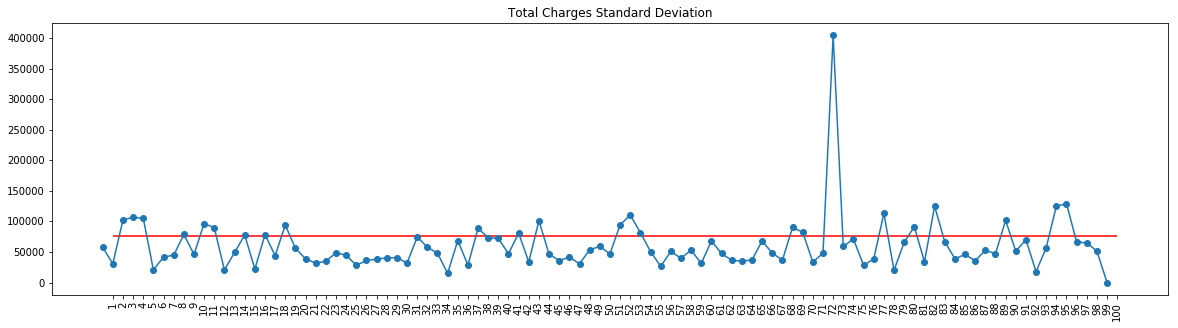

In [179]:
plt.figure(figsize = (20, 5))
plt.plot(charges_std, marker = "o")
plt.hlines(y = df["Total.Charges"].std(), xmin = 1, xmax = 100, color = "red")
plt.xticks(list(range(1, 101)), rotation = 90)
plt.title("Total Charges Standard Deviation")
plt.savefig("cost_std.png")

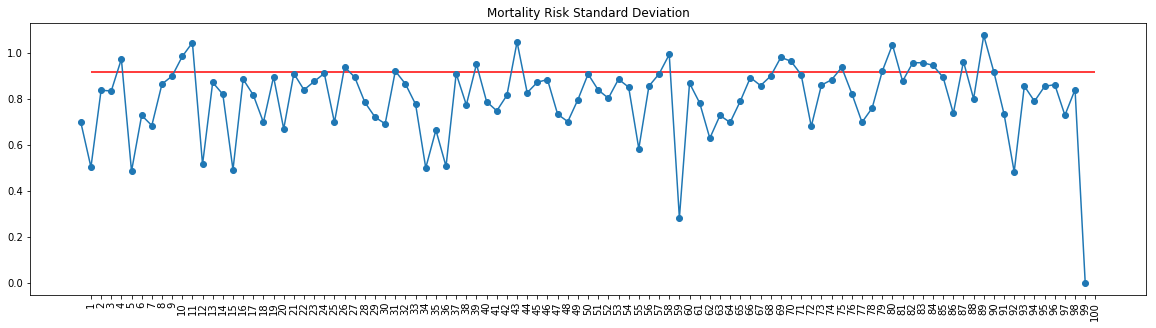

In [180]:
plt.figure(figsize = (20, 5))
plt.plot(mort_std, marker = "o")
plt.hlines(y = df["APR.Risk.of.Mortality"].std(), xmin = 1, xmax = 100, color = "red")
plt.xticks(list(range(1, 101)), rotation = 90)
plt.title("Mortality Risk Standard Deviation")
plt.savefig("mort_std.png")

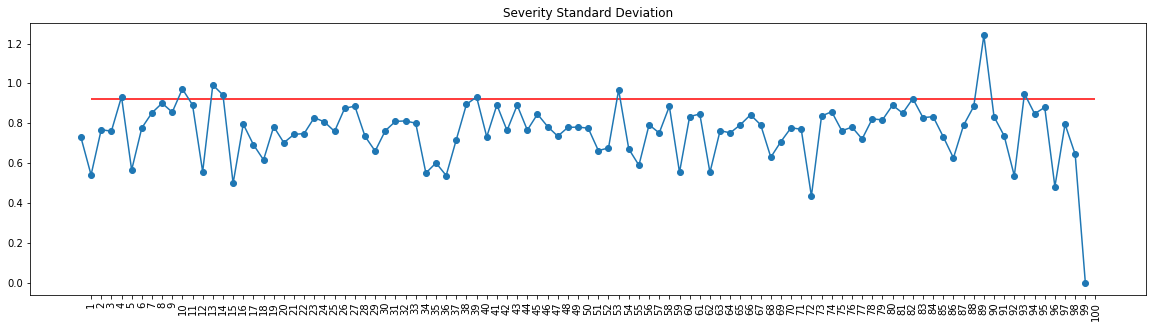

In [181]:
plt.figure(figsize = (20, 5))
plt.plot(serv_std, marker = "o")
plt.hlines(y = df["APR.Severity.of.Illness.Code"].std(), xmin = 1, xmax = 100, color = "red")
plt.xticks(list(range(1, 101)), rotation = 90)
plt.title("Severity Standard Deviation")
plt.savefig("serv_std.png")

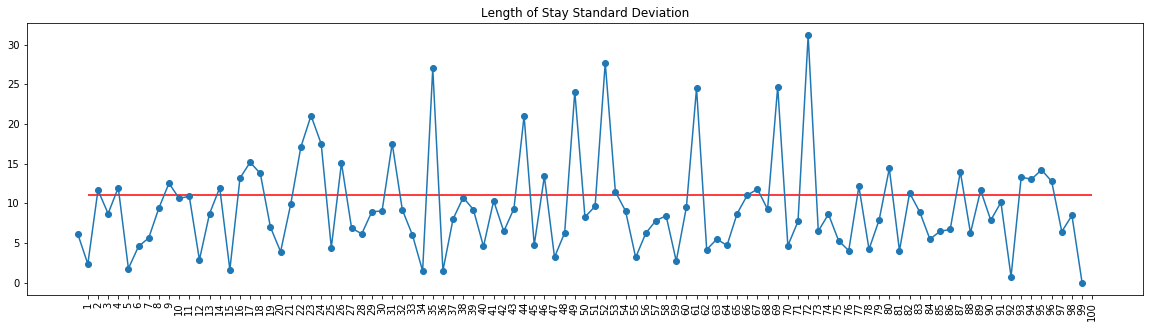

In [182]:
plt.figure(figsize = (20, 5))
plt.plot(stay_std, marker = "o")
plt.hlines(y = df["Length.of.Stay"].std(), xmin = 1, xmax = 100, color = "red")
plt.xticks(list(range(1, 101)), rotation = 90)
plt.title("Length of Stay Standard Deviation")
plt.savefig("stay_std.png")

In [186]:
sum(list(map(lambda x: 1 if x < df["Total.Charges"].std() else 0, charges_std)))/100

0.76

In [187]:
sum(list(map(lambda x: 1 if x < df["APR.Risk.of.Mortality"].std() else 0, mort_std)))/100

0.82

In [188]:
sum(list(map(lambda x: 1 if x < df["APR.Severity.of.Illness.Code"].std() else 0, serv_std)))/100

0.91

In [189]:
sum(list(map(lambda x: 1 if x < df["Length.of.Stay"].std() else 0, stay_std)))/100

0.69

In [193]:
printSums(71)

Total.Charges                                                29043990.83
APR.Severity.of.Illness.Code                                     1329.00
APR.Risk.of.Mortality                                            1133.00
Age.Ordinal                                                      2302.00
Length.of.Stay                                                   4524.00
Hospital.County.Bronx                                              89.00
Hospital.County.Kings                                             155.00
Hospital.County.Manhattan                                         183.00
Hospital.County.Queens                                             76.00
Hospital.County.Richmond                                           25.00
Type.of.Admission.Elective                                         40.00
Type.of.Admission.Emergency                                       456.00
Type.of.Admission.Newborn                                           0.00
Type.of.Admission.Urgent                           